# SQL for Data Analysis 
<hr>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-SQL" data-toc-modified-id="Basic-SQL-1">Basic SQL</a></span><ul class="toc-item"><li><span><a href="#Entity-Relationship-Diagram-(ERD)-Fundamentals" data-toc-modified-id="Entity-Relationship-Diagram-(ERD)-Fundamentals-1.1">Entity Relationship Diagram (ERD) Fundamentals</a></span></li><li><span><a href="#Some-SQL-Statements" data-toc-modified-id="Some-SQL-Statements-1.2">Some SQL Statements</a></span></li><li><span><a href="#Formatting-Best-Practices" data-toc-modified-id="Formatting-Best-Practices-1.3">Formatting Best Practices</a></span></li><li><span><a href="#SELECT-&amp;-FROM-Statements" data-toc-modified-id="SELECT-&amp;-FROM-Statements-1.4">SELECT &amp; FROM Statements</a></span></li><li><span><a href="#LIMIT-Statement" data-toc-modified-id="LIMIT-Statement-1.5">LIMIT Statement</a></span></li><li><span><a href="#ORDER-BY-Statement" data-toc-modified-id="ORDER-BY-Statement-1.6">ORDER BY Statement</a></span></li><li><span><a href="#WHERE-Statement" data-toc-modified-id="WHERE-Statement-1.7">WHERE Statement</a></span></li><li><span><a href="#DERIVED-COLUMN" data-toc-modified-id="DERIVED-COLUMN-1.8">DERIVED COLUMN</a></span></li></ul></li><li><span><a href="#LOGICAL-OPERATORS" data-toc-modified-id="LOGICAL-OPERATORS-2">LOGICAL OPERATORS</a></span><ul class="toc-item"><li><span><a href="#LIKE-Operator" data-toc-modified-id="LIKE-Operator-2.1">LIKE Operator</a></span></li><li><span><a href="#IN-Operator" data-toc-modified-id="IN-Operator-2.2">IN Operator</a></span></li><li><span><a href="#NOT-Operator" data-toc-modified-id="NOT-Operator-2.3">NOT Operator</a></span></li><li><span><a href="#AND-&amp;-BETWEEN-Operators" data-toc-modified-id="AND-&amp;-BETWEEN-Operators-2.4">AND &amp; BETWEEN Operators</a></span></li><li><span><a href="#OR-Operator" data-toc-modified-id="OR-Operator-2.5">OR Operator</a></span></li></ul></li><li><span><a href="#Commands" data-toc-modified-id="Commands-3">Commands</a></span></li><li><span><a href="#Other-Tips" data-toc-modified-id="Other-Tips-4">Other Tips</a></span></li></ul></div>

## Basic SQL

### Entity Relationship Diagram (ERD) Fundamentals

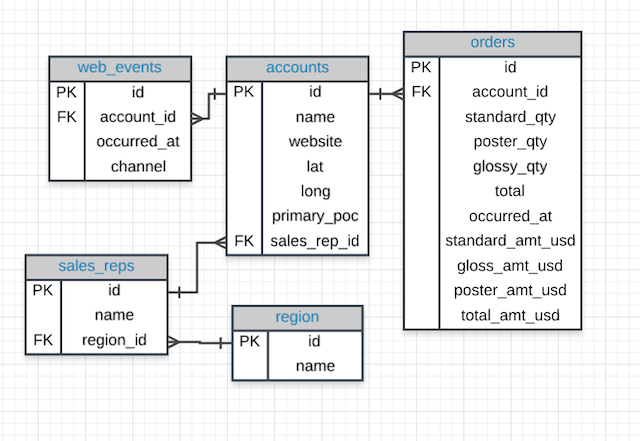

  Term       | Definition                                                          
 :-----------|:-----------
 primary_poc |a column name in the Parch & Posey database                          
 web_events  |a table name in the Parch & Posey database                           
 database    |a collection of tables that share connected data stored in a computer
 ERD         |a diagram that shows how data is structured in a database
 SQL         |a language that allows us to access data stored in a database


### Some SQL Statements 
<i>(Note: PostgreSQL is used for lessons in this course)</i>

Statement    | Meaning
:------------|:-------
CREATE TABLE |creates a new table in a database
DROP TABLE   |removes a table in a database
SELECT       | allows you to read data and display it. This is called a query

### Formatting Best Practices

>1. It is common and best practice to capitalize all SQL commands, like SELECT and FROM, 
   and keep everything else in your query lower case.
2. Avoid spaces in table and variable names
3. Use white spaces in queries
4. Put a semicolon at the end of each statement

### SELECT & FROM Statements

'SELECT' indicates which column(s) you want to be given data for.
'FROM' specifies from which table(s) you want to select the columns.

**Examples:**

1. To select all columns from the table 'orders'
```sql
SELECT *
FROM orders;
```

2. To select only specified columns from the table 'orders'
```sql
SELECT id, account_id, occurred_at
FROM orders;
```

### LIMIT Statement

**Example:**

Show just the first 10 rows of the orders table with all of the columns
    
```sql
SELECT *
FROM orders
LIMIT 10;
```

### ORDER BY Statement
Allows us to sort our results using the data in any columnn.
'ORDER BY' must appear after 'FROM' and before 'LIMIT'

To sort in descending order, add 'DESC' after the column name (the default is in ascending order)
```sql
SELECT id, account_id, total_amt_usd
FROM orders
ORDER BY total_amt_usd DESC
LIMIT 5;
```
    
When you provide a list of columns in an ORDER BY command, the sorting occurs using the 
leftmost column in your list first, then the next column from the left, and so on. 

**Example:**

Sort first by the account ID(in ascending order), and then by the total dollar amount(in descending order)
```sql
SELECT id, account_id, total_amt_usd
FROM orders
ORDER BY account_id, total_amt_usd DESC;
```

### WHERE Statement
Allows your to filter a set of results based on specific criteria.
The 'WHERE' clause goes after 'FROM' but before 'ORDER BY' or 'LIMIT'

Common operators used in 'WHERE' statements include:
```
> (greater than), < (less than), >= (greater than or equal to), 
<= (less than or equal to), = (equal to), != (not equal to)
```  
**Examples:**

Pull the first 5 rows and all columns from the orders table that have a dollar amount of 
gloss_amt_usd greater than or equal to 1000.
```sql
SELECT *
FROM orders
WHERE gloss_amt_usd >= 1000
LIMIT 5;
```    
If you are using an operator with non-numeric values, you need to put the value in single quotes.
```sql
SELECT name, website, primary_poc
FROM accounts
WHERE name = 'Exxon Mobil';
```

### DERIVED COLUMN
>A new column that is a combination of existing columns (a.k.a 'calculated' or 'computed' column).
A derived column is generally only temporary, existing just for the duration of the query.
To give the derived column a name, use the 'AS' keyword.
Order of operations applies when using arithmetic operators in SQL.

**Example:**

Create a column that divides the standard_amt_usd by the standard_qty to find the unit price 
for standard paper for each order. Limit the results to the first 10 orders, and include the 
id and account_id fields. 
```sql
SELECT id, account_id, standard_amt_usd/standard_qty AS unit_price
FROM orders
LIMIT 10;
```

## LOGICAL OPERATORS

### LIKE Operator

The % sign is used as a wildcard character to represent a character 
or any number of characters whatever those characters may be.

**Examples:**

Use the accounts table to find:

1. All the companies whose name start with 'C'
```sql
SELECT name
FROM accounts
WHERE name LIKE 'C%';
```
2. All companies whose name contain the string 'one' somewhere in the name.
```sql
SELECT name
FROM accounts
WHERE name LIKE '%one%';
```
3. All companies whose names end with 's'
```sql
SELECT name
FROM accounts
WHERE name LIKE '%s';
```

### IN Operator

IN requires single or double quotation marks around non-numerical data.

**Examples:**

1. Use the accounts table to find the account name, primary_poc, and sales_rep_id
   for Walmart, Target, and Nordstrom.
```sql
SELECT name, primary_poc, sales_rep_id
FROM accounts
WHERE name IN ('Walmart', 'Target', 'Nordstrom');
```   
2. Use the web_events table to find all information regarding individuals
   who were contacted via the channel of organic and adwords.
```sql
SELECT *
FROM web_events
WHERE channel IN ('organic', 'adwords')
```

### NOT Operator

Provides the inverse results for IN, LIKE, and similar operators.

**Examples:**

1. Use the accounts table to find all the companies whose name do not start with 'C'
```sql
SELECT name
FROM accounts
WHERE name NOT LIKE 'C%';
```   
2. Use the accounts table to find the account name, primary poc, and sales rep id 
   for all stores except Walmart, Target, and Nordstrom.
```sql 
SELECT name, primary_poc, sales_rep_id
FROM accounts
WHERE name NOT IN ('Walmart', 'Target', 'Nordstrom');
```

### AND & BETWEEN Operators

The AND operator is used within a WHERE statement to filter based on multiple criteria.

The BETWEEN operator in SQL is inclusive,i.e., the endpoint values are included 
(refer to example 3 below)

Notice that using BETWEEN is tricky for dates! While BETWEEN is generally inclusive of 
endpoints, it assumes the time is at 00:00:00 (i.e. midnight) for dates. 
This is the reason why we set the right-side endpoint of the period at '2017-01-01'
(refer to example 4 below).

**Examples:**

1. Write a query that returns all the orders where the standard_qty is over 1000, 
   the poster_qty is 0, and the gloss_qty is 0.
```sql 
SELECT *
FROM orders
WHERE standard_qty > 1000 AND poster_qty = 0 AND gloss_qty = 0;
```    
2. Using the accounts table, find all the companies whose names do not start with 'C' 
   and end with 's'.
```sql   
SELECT name
FROM accounts
WHERE name NOT LIKE 'C%' AND name LIKE '%s';
```    
3. Write a query that displays the order date and gloss_qty data for all orders where 
   gloss_qty is between 24 and 29.
```sql   
SELECT occurred_at, gloss_qty 
FROM orders
WHERE gloss_qty BETWEEN 24 AND 29;
```    
4. Use the web_events table to find all information regarding individuals who were contacted 
   via the organic or adwords channels, and started their account at any point in 2016, 
   sorted from newest to oldest.
```sql   
SELECT *
FROM web_events
WHERE channel IN ('organic', 'adwords') AND occurred_at 
    BETWEEN '2016-01-01' AND '2017-01-01'
ORDER BY occurred_at DESC;
```

### OR Operator

OR is a logical operator in SQL that allows you to select rows that satisfy either of two conditions.

OR can be combined with other operators by using parentheses.

**Examples:**

1. Find list of orders ids where either gloss_qty or poster_qty is greater than 4000. Only     include the id field in the resulting table.
```sql
SELECT id
FROM orders
WHERE gloss_qty > 4000 OR poster_qty > 4000;
```
2. Write a query that returns a list of orders where the standard_qty is zero and either the gloss_qty or poster_qty is over 1000.
```sql
SELECT *
FROM orders
WHERE standard_qty = 0 AND (gloss_qty > 1000 OR poster_qty > 1000);
```
3. Find all the company names that start with a 'C' or 'W', and the primary contact contains 'ana' or 'Ana', but it doesn't contain 'eana'. 
```sql
SELECT *
FROM accounts
WHERE (name LIKE 'C%' OR name LIKE 'W%') 
    AND ((primary_poc LIKE '%ana%' OR primary_poc LIKE '%Ana%') 
    AND primary_poc NOT LIKE '%eana%');
```

## Commands

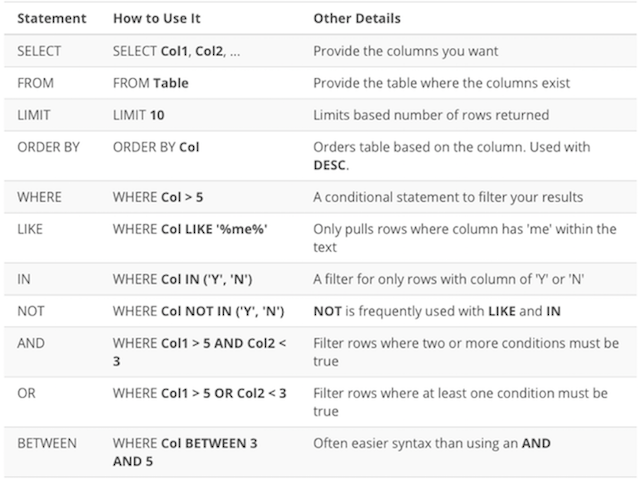

## Other Tips

Though SQL is not case sensitive (it doesn't care if you write your statements as all uppercase or lowercase), we discussed some best practices. The order of the key words does matter! Using what you know so far, you will want to write your statements as:
```sql
SELECT col1, col2
FROM table1
WHERE col3 > 5 AND col4 LIKE '%os%'
ORDER BY col5
LIMIT 10;
```
Notice, you can retrieve different columns than those being used in the ORDER BY and WHERE statements. Assuming all of these column names existed in this way (col1, col2, col3, col4, col5) within a table called table1, this query would run just fine.